In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pylab as plt


In [2]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [3]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim))
    b = 0.
    
    return w, b

In [4]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[0]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w,X.T)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))   # compute cost
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X.T,(A-Y))
    db = (1./m)*np.sum(A-Y)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [5]:
def adam_iteration(g, x, m, v, iteration, learn_rate, beta1, beta2, eps=1e-8):

	m = beta1 * m + (1.0 - beta1) * g
	v = beta2 * v + (1.0 - beta2) * g**2
	mhat = m / (1.0 - beta1**(iteration + 1))
	vhat = v / (1.0 - beta2**(iteration + 1))

	x = x - learn_rate * mhat / (np.sqrt(vhat) + eps)

	
	return (x, m, v)

In [6]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False, method = 'GD'):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []

    if method == 'GD':
    
        for i in range(num_iterations):
                    
            # Cost and gradient calculation 
            grads, cost = propagate(w,b,X,Y)

            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]
            
            # update rule

            w -=learning_rate*dw
            b -=learning_rate*db
            
            # Record the costs
            costs.append(cost)
            
            # Print the cost every 100 training iterations
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
        
        params = {"w": w,
                "b": b}
        
        grads = {"dw": dw,
                "db": db}
        
        return params, grads, costs

    if method == 'SGD':
        tolerance = 1e-06
        
        m = len(Y)
        diff_w = 0
        diff_b = 0

        for i in range(num_iterations):
                    
            # Cost and gradient calculation 
            for j in range(m):
                rand_ind = np.random.randint(0,m)
                X_i = X[rand_ind]

                y_i = Y[rand_ind]

                grads, cost = propagate(w,b,X_i,y_i)
                
                # Retrieve derivatives from grads
                dw = grads["dw"]
                db = grads["db"]
                
                # update rule

                w -=learning_rate*dw
                b -=learning_rate*db

                diff_w = 0.1 * diff_w - learning_rate * dw
                diff_b = 0.1 * diff_b - learning_rate * db

                if np.all(np.abs(diff_w) <= tolerance):
                        break

                if np.all(np.abs(diff_b) <= tolerance):
                        break

                
            # Record the costs
            costs.append(cost)
                
            # Print the cost every 100 training iterations
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
            
        params = {"w": w,
                "b": b}
        
        grads = {"dw": dw,
                "db": db}
        
        return params, grads, costs
    
    if method == 'Adam':
        m_w = 0 
        v_w = 0
        m_b = 0
        v_b = 0

        for i in range(num_iterations):

            # Cost and gradient calculation 
            grads, cost = propagate(w,b,X,Y)
            
            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]

            w, m_w, v_w = adam_iteration(dw, w, m_w, v_w, i, 1e-2, 0.9, 0.999)
            b, m_b, v_b = adam_iteration(db, b, m_b, v_b, i, 1e-2, 0.9, 0.999)

            # Record the costs
            costs.append(cost)


            # Print the cost every 100 training iterations
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))

        params = {"w": w,
                "b": b}
        
        grads = {"dw": dw,
                "db": db}
        
        return params, grads, costs


In [7]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    # w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(X,w)+b)
    
    for i in range(A.shape[0]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [8]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, method = 'GD'):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[1])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, method)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [9]:
df = pd.read_csv('./bioresponse.csv')
y = df['Activity'].values
X = df.drop(['Activity'], axis=1)
df


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [10]:

train_data, test_data, train_labels, test_labels = train_test_split(X,
                                                                    y,
                                                                    test_size=0.25,
                                                                    random_state=1)
print(train_data.shape)
# train_set_y
Adam = model(train_data.to_numpy(), train_labels, test_data, test_labels, num_iterations = 1000, learning_rate = 1e-2, print_cost = True, method='Adam')

(2813, 1776)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.379723
Cost after iteration 200: 0.329602
Cost after iteration 300: 0.300613
Cost after iteration 400: 0.280406
Cost after iteration 500: 0.264961
Cost after iteration 600: 0.252462
Cost after iteration 700: 0.241957
Cost after iteration 800: 0.232886
Cost after iteration 900: 0.224896
train accuracy: 92.60575897618202 %
test accuracy: 74.09381663113007 %


In [11]:
GD = model(train_data.to_numpy(), train_labels, test_data, test_labels, num_iterations = 1000, learning_rate = 1e-2, print_cost = True, method='GD')

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.633396
Cost after iteration 200: 0.601225
Cost after iteration 300: 0.578998
Cost after iteration 400: 0.562293
Cost after iteration 500: 0.549066
Cost after iteration 600: 0.538222
Cost after iteration 700: 0.529108
Cost after iteration 800: 0.521302
Cost after iteration 900: 0.514515
train accuracy: 77.07074297902595 %
test accuracy: 74.6268656716418 %


In [12]:
SGD = model(train_data.to_numpy(), train_labels, test_data, test_labels, num_iterations = 1000, learning_rate = 1e-2, print_cost = True, method='SGD')

Cost after iteration 0: 0.000374
Cost after iteration 100: 0.000149
Cost after iteration 200: 0.000121
Cost after iteration 300: 0.000120
Cost after iteration 400: 0.000125
Cost after iteration 500: 0.000120
Cost after iteration 600: 0.000144
Cost after iteration 700: 0.000165
Cost after iteration 800: 0.000141
Cost after iteration 900: 0.000116
train accuracy: 73.23142552435124 %
test accuracy: 71.85501066098081 %


Text(0.5, 1.0, 'Adam')

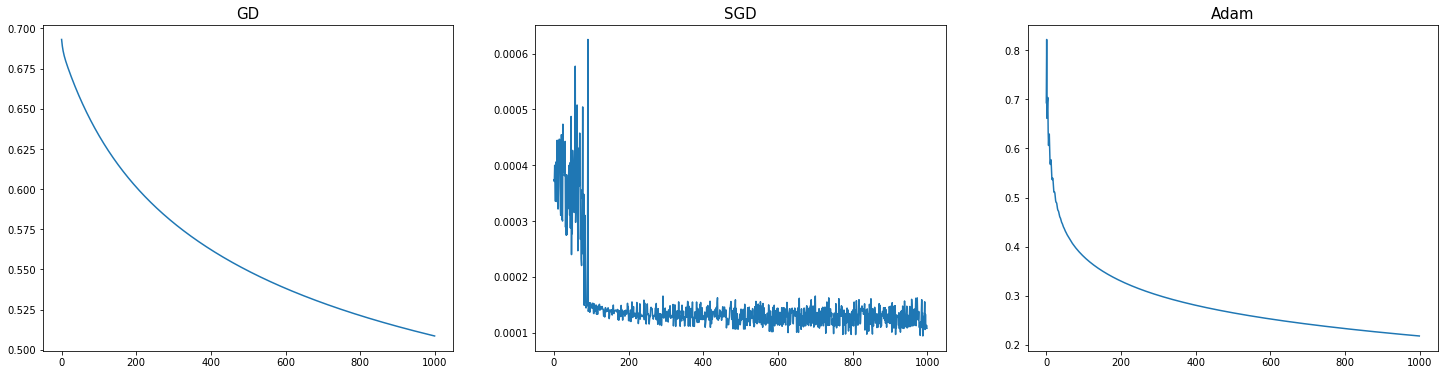

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

ax[0].plot(GD["costs"])
ax[0].set_title(u"GD",fontsize = 15)

ax[1].plot(SGD["costs"])
ax[1].set_title(u"SGD",fontsize = 15)

ax[2].plot(Adam["costs"])
ax[2].set_title(u"Adam",fontsize = 15)
